In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [82]:
data = pd.read_csv('heart.csv', encoding = 'utf-8')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [84]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Figure size 1440x720 with 0 Axes>

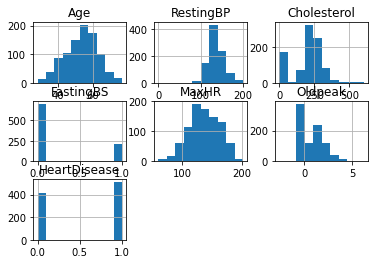

In [85]:
d = data
plt.figure(figsize= (20,10))
d.hist()
plt.title('Data Description')
plt.show()

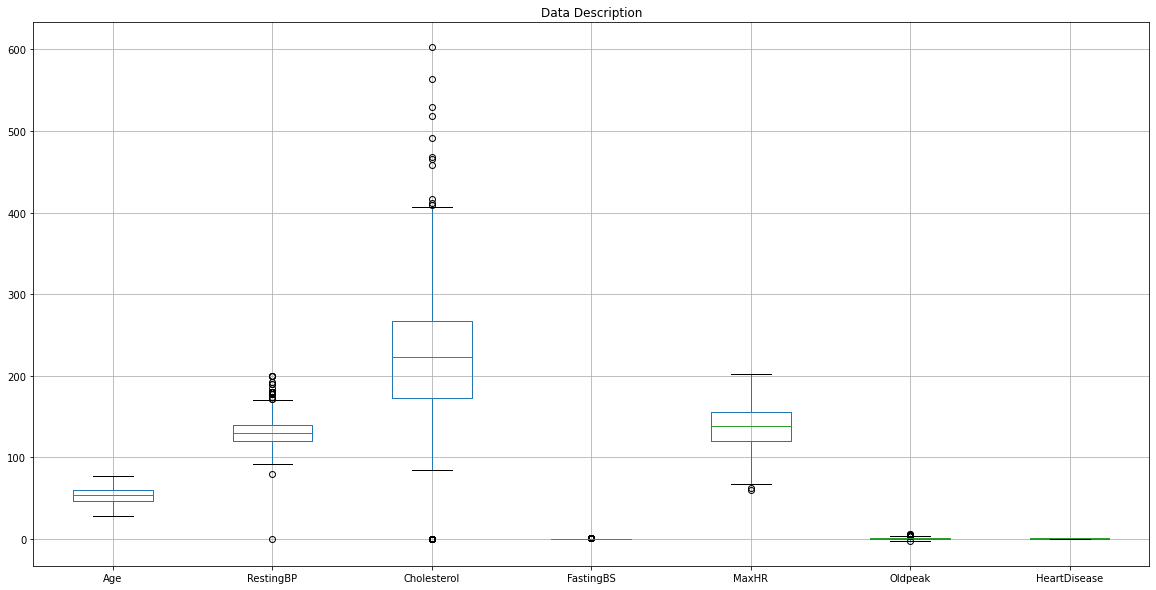

In [86]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [87]:
d[d['Cholesterol'] > 420 ]
d.drop([28,30,76,103,149,250,616], axis=0, inplace=True)


In [88]:
d[d['RestingBP'] < 90]

d.drop([449], axis=0, inplace=True)

d[d['RestingBP'] < 90]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0


In [89]:
d[d['RestingBP'] > 180]
d.drop([109,241,365,372,399,592,732,759], axis=0, inplace=True)
d[d['RestingBP'] < 0].count()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [90]:
d[d['MaxHR'] < 70]
#d.drop([370,390,402,496], axis=0, inplace=True)
#d[d['MaxHR'] < 70]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0


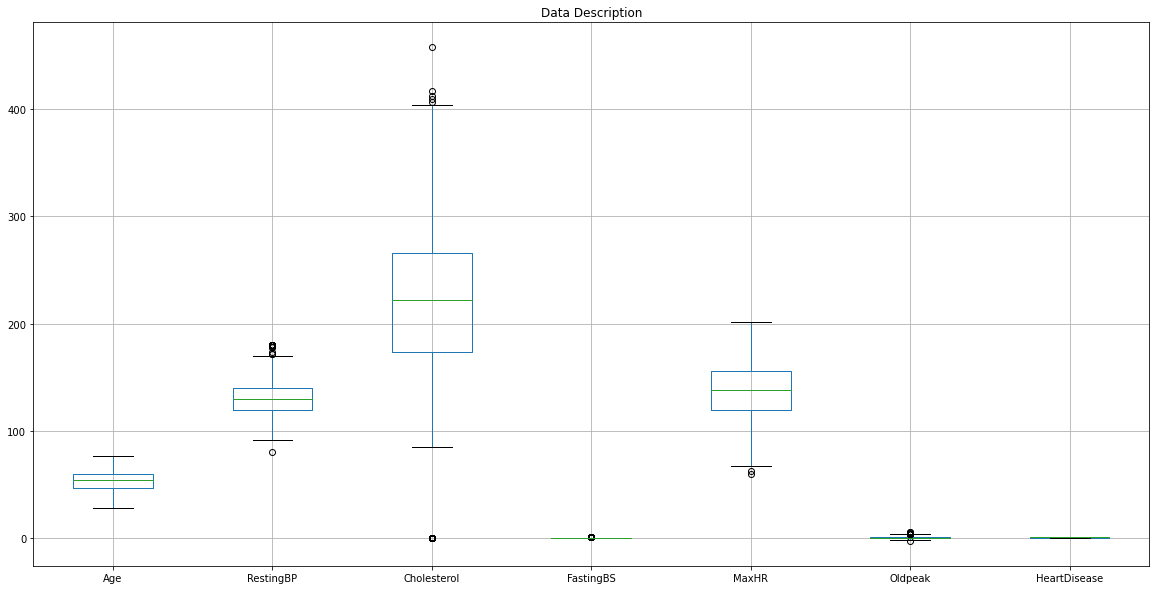

In [91]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [92]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             902 non-null    int64  
 1   Sex             902 non-null    object 
 2   ChestPainType   902 non-null    object 
 3   RestingBP       902 non-null    int64  
 4   Cholesterol     902 non-null    int64  
 5   FastingBS       902 non-null    int64  
 6   RestingECG      902 non-null    object 
 7   MaxHR           902 non-null    int64  
 8   ExerciseAngina  902 non-null    object 
 9   Oldpeak         902 non-null    float64
 10  ST_Slope        902 non-null    object 
 11  HeartDisease    902 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ KB


In [93]:
d.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,53.517738,132.047672,196.853659,0.231707,136.854767,0.887472,0.548780
std,9.431052,17.125150,105.607385,0.422157,25.425611,1.065954,0.497891
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,265.750000,0.000000,156.000000,1.500000,1.000000
max,77.000000,180.000000,458.000000,1.000000,202.000000,6.200000,1.000000


In [94]:
d.loc[321,'Oldpeak'] = 0.9
d.loc[324,'Oldpeak'] = 2.6
d.loc[325,'Oldpeak'] = 1.5
d.loc[326,'Oldpeak'] = 0.1
d.loc[331,'Oldpeak'] = 1.0
d.loc[332,'Oldpeak'] = 1.1
d.loc[334,'Oldpeak'] = 0.7
d.loc[335,'Oldpeak'] = 0.8
d.loc[352,'Oldpeak'] = 1.0
d.loc[407,'Oldpeak'] = 0.5
d.loc[413,'Oldpeak'] = 2.0
d.loc[421,'Oldpeak'] = 0.5
d.loc[512,'Oldpeak'] = 0.1

d[d['Oldpeak'] < 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [95]:
d.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,53.517738,132.047672,196.853659,0.231707,136.854767,0.915854,0.548780
std,9.431052,17.125150,105.607385,0.422157,25.425611,1.041643,0.497891
min,28.000000,80.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,265.750000,0.000000,156.000000,1.500000,1.000000
max,77.000000,180.000000,458.000000,1.000000,202.000000,6.200000,1.000000


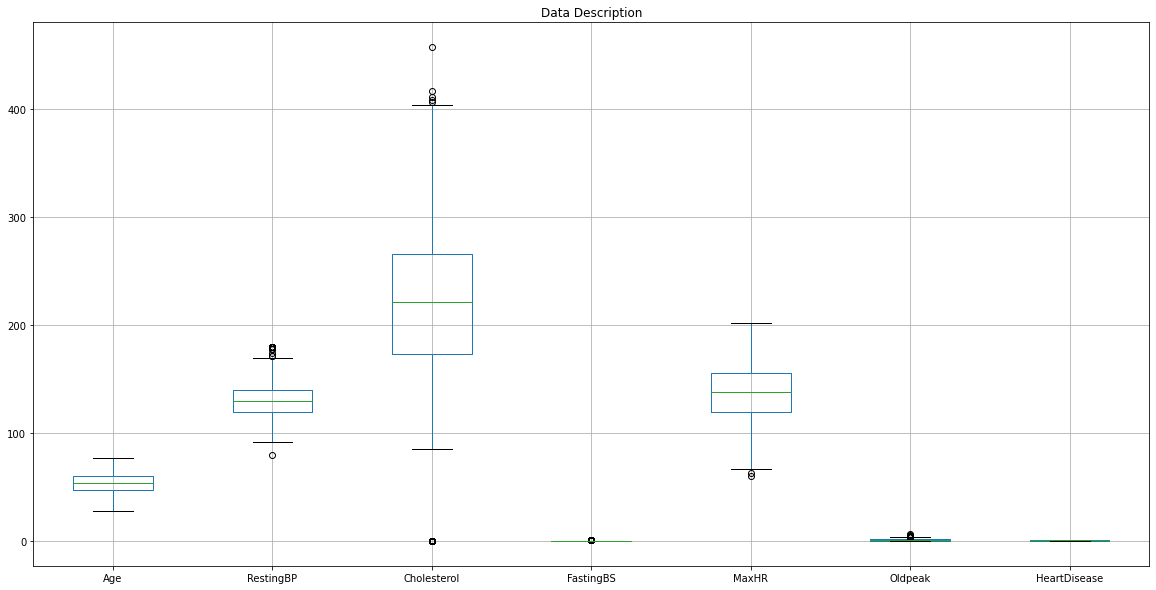

In [96]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [97]:
d[d['Cholesterol'] > 420]
d.drop([496], axis=0, inplace=True)

In [98]:
d[d['Cholesterol'] > 420]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


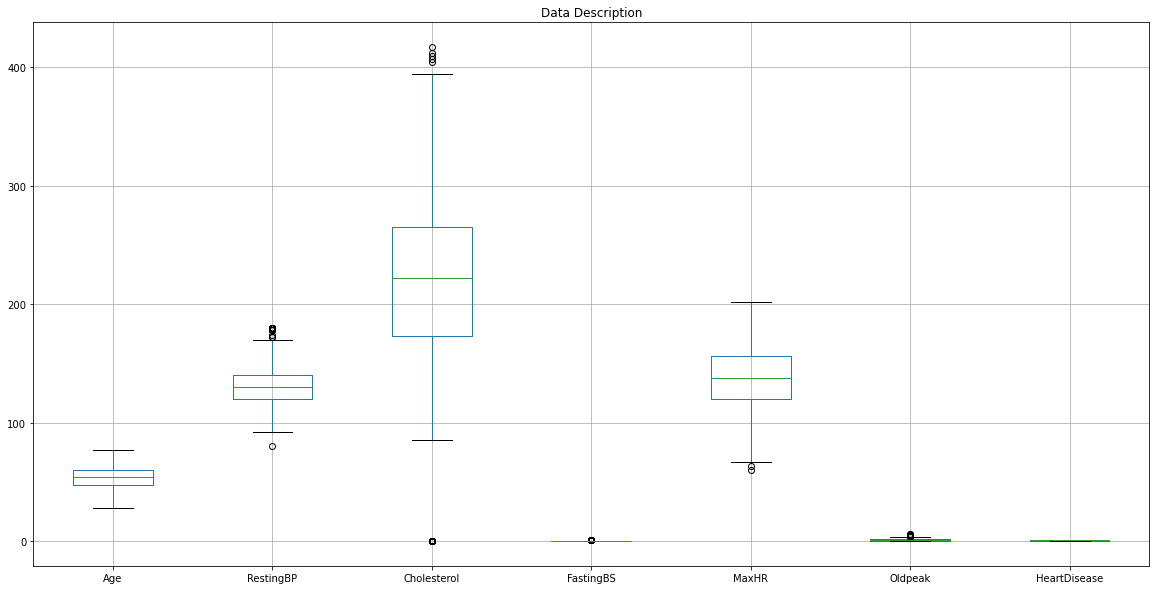

In [99]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [100]:
d[d['MaxHR'] < 67]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [101]:
d.drop([370,390], axis=0, inplace=True)

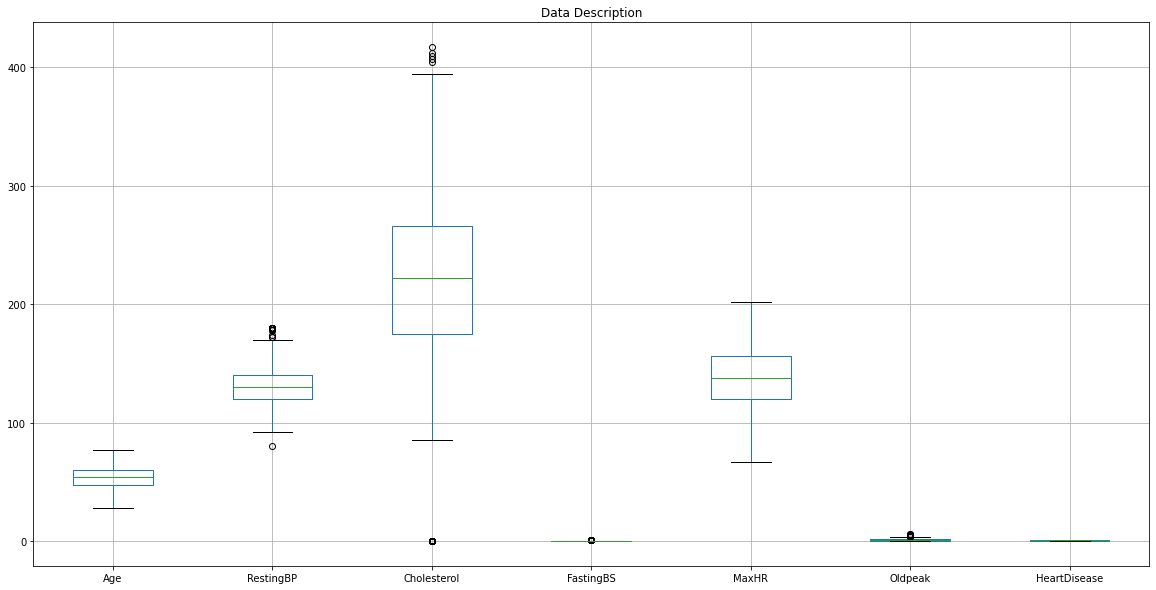

In [102]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [103]:
d[d['RestingBP'] < 90]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0


In [104]:
d.drop([314], axis=0, inplace=True)

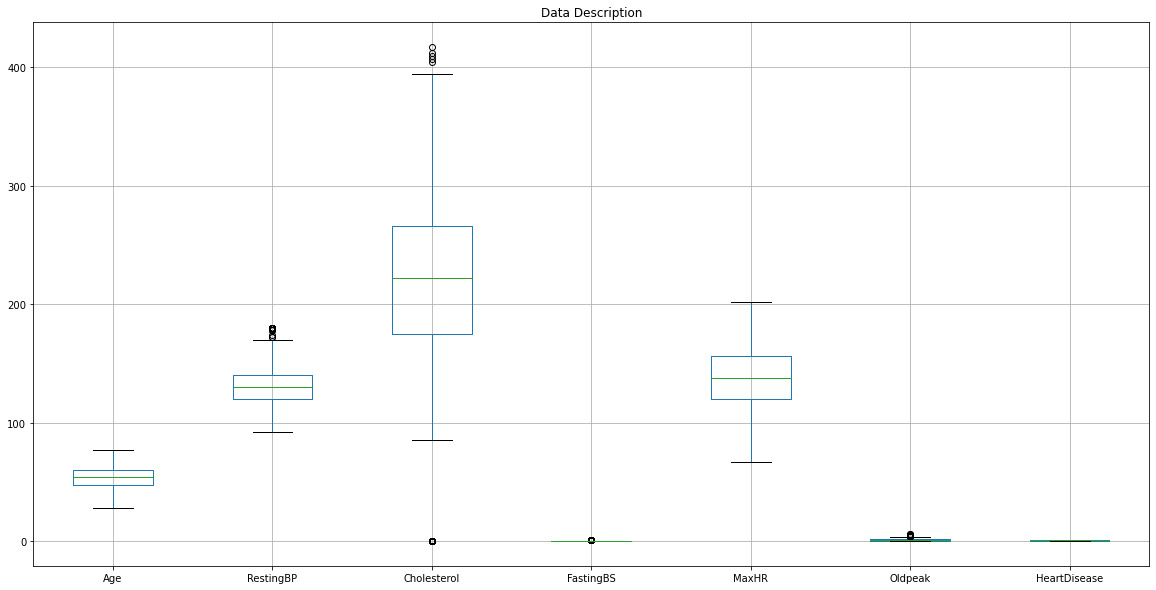

In [105]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [106]:
d[d['Cholesterol'] > 390]
d.drop([69,102,123,182,256,624,667,796,803], axis=0, inplace=True)


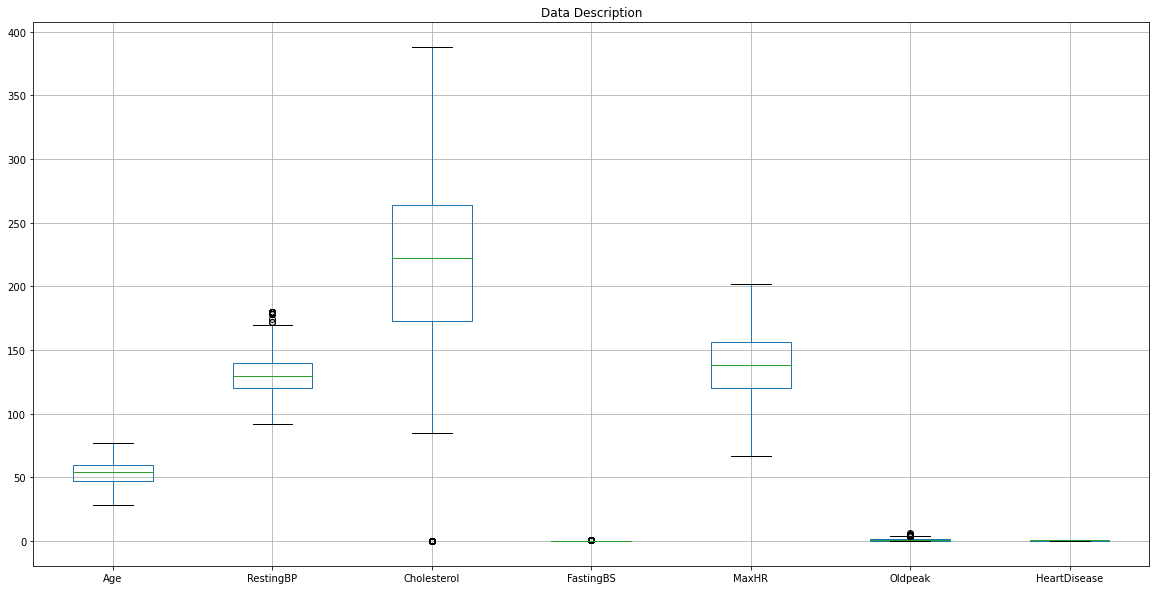

In [107]:
atts = list = ['Age', 'RestingBP', 'Cholesterol' , 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize= (20,10))
d[atts].boxplot()
plt.title('Data Description')
plt.show()

In [108]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             889 non-null    int64  
 1   Sex             889 non-null    object 
 2   ChestPainType   889 non-null    object 
 3   RestingBP       889 non-null    int64  
 4   Cholesterol     889 non-null    int64  
 5   FastingBS       889 non-null    int64  
 6   RestingECG      889 non-null    object 
 7   MaxHR           889 non-null    int64  
 8   ExerciseAngina  889 non-null    object 
 9   Oldpeak         889 non-null    float64
 10  ST_Slope        889 non-null    object 
 11  HeartDisease    889 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


In [109]:
data=pd.get_dummies(data,drop_first=True)

In [110]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [111]:
x=data.drop("HeartDisease",axis=1)
y=data["HeartDisease"]

In [112]:
from sklearn.model_selection import train_test_split
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,random_state=5,test_size=0.3,stratify=y)

In [113]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=5)
random_forest.fit(x_egitim,y_egitim)
y_tahmin =random_forest.predict(x_test)

In [114]:
score=random_forest.score(x_test,y_test)

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_tahmin)
print(cm)

[[ 98  22]
 [ 10 137]]


In [116]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_tahmin)

0.8801498127340824

In [117]:
print(classification_report(y_test,y_tahmin))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       120
           1       0.86      0.93      0.90       147

    accuracy                           0.88       267
   macro avg       0.88      0.87      0.88       267
weighted avg       0.88      0.88      0.88       267



In [118]:
x_egitim,x_test,y_egitim,y_test = train_test_split(x,y,stratify = y , random_state=0,test_size=0.3)
scaler = StandardScaler()
scaler.fit(x_egitim)
x_egitim = scaler.transform(x_egitim)
x_test= scaler.transform(x_test)

In [119]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50,2)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x_egitim, y_egitim)
print(knn_gscv.best_params_)

{'n_neighbors': 29}


In [120]:
print(accuracy_score(y_test,y_tahmin))

0.5131086142322098
